# Description
Makes an image of a 2D slice of the density field to illustrate the splitting into density bins. A slice in $x-y$ coordinates will be plotted, considering all galaxies which are positioned within a specified range of the $z$ coordinate. When plotting a histogram for the $z$ coordinate of all galaxies, we find a very uniform distribution between $z = 0, 2000$ Gpc/h, suggesting the choice of $z$ range is not significant. 

Also produces a similar image contrasting two regions of extreme densities (low and high).   

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# load catalog and seletion array for every density percentile 
filepath_cat = '/disk11/salam/FirstGenMocks/AbacusSummit/CubicBox/BGS_v2/z0.200/AbacusSummit_base_c000_ph006/BGS_box_ph006.fits'
cat = FITSCatalog(filepath_cat)
BoxSize = 2000

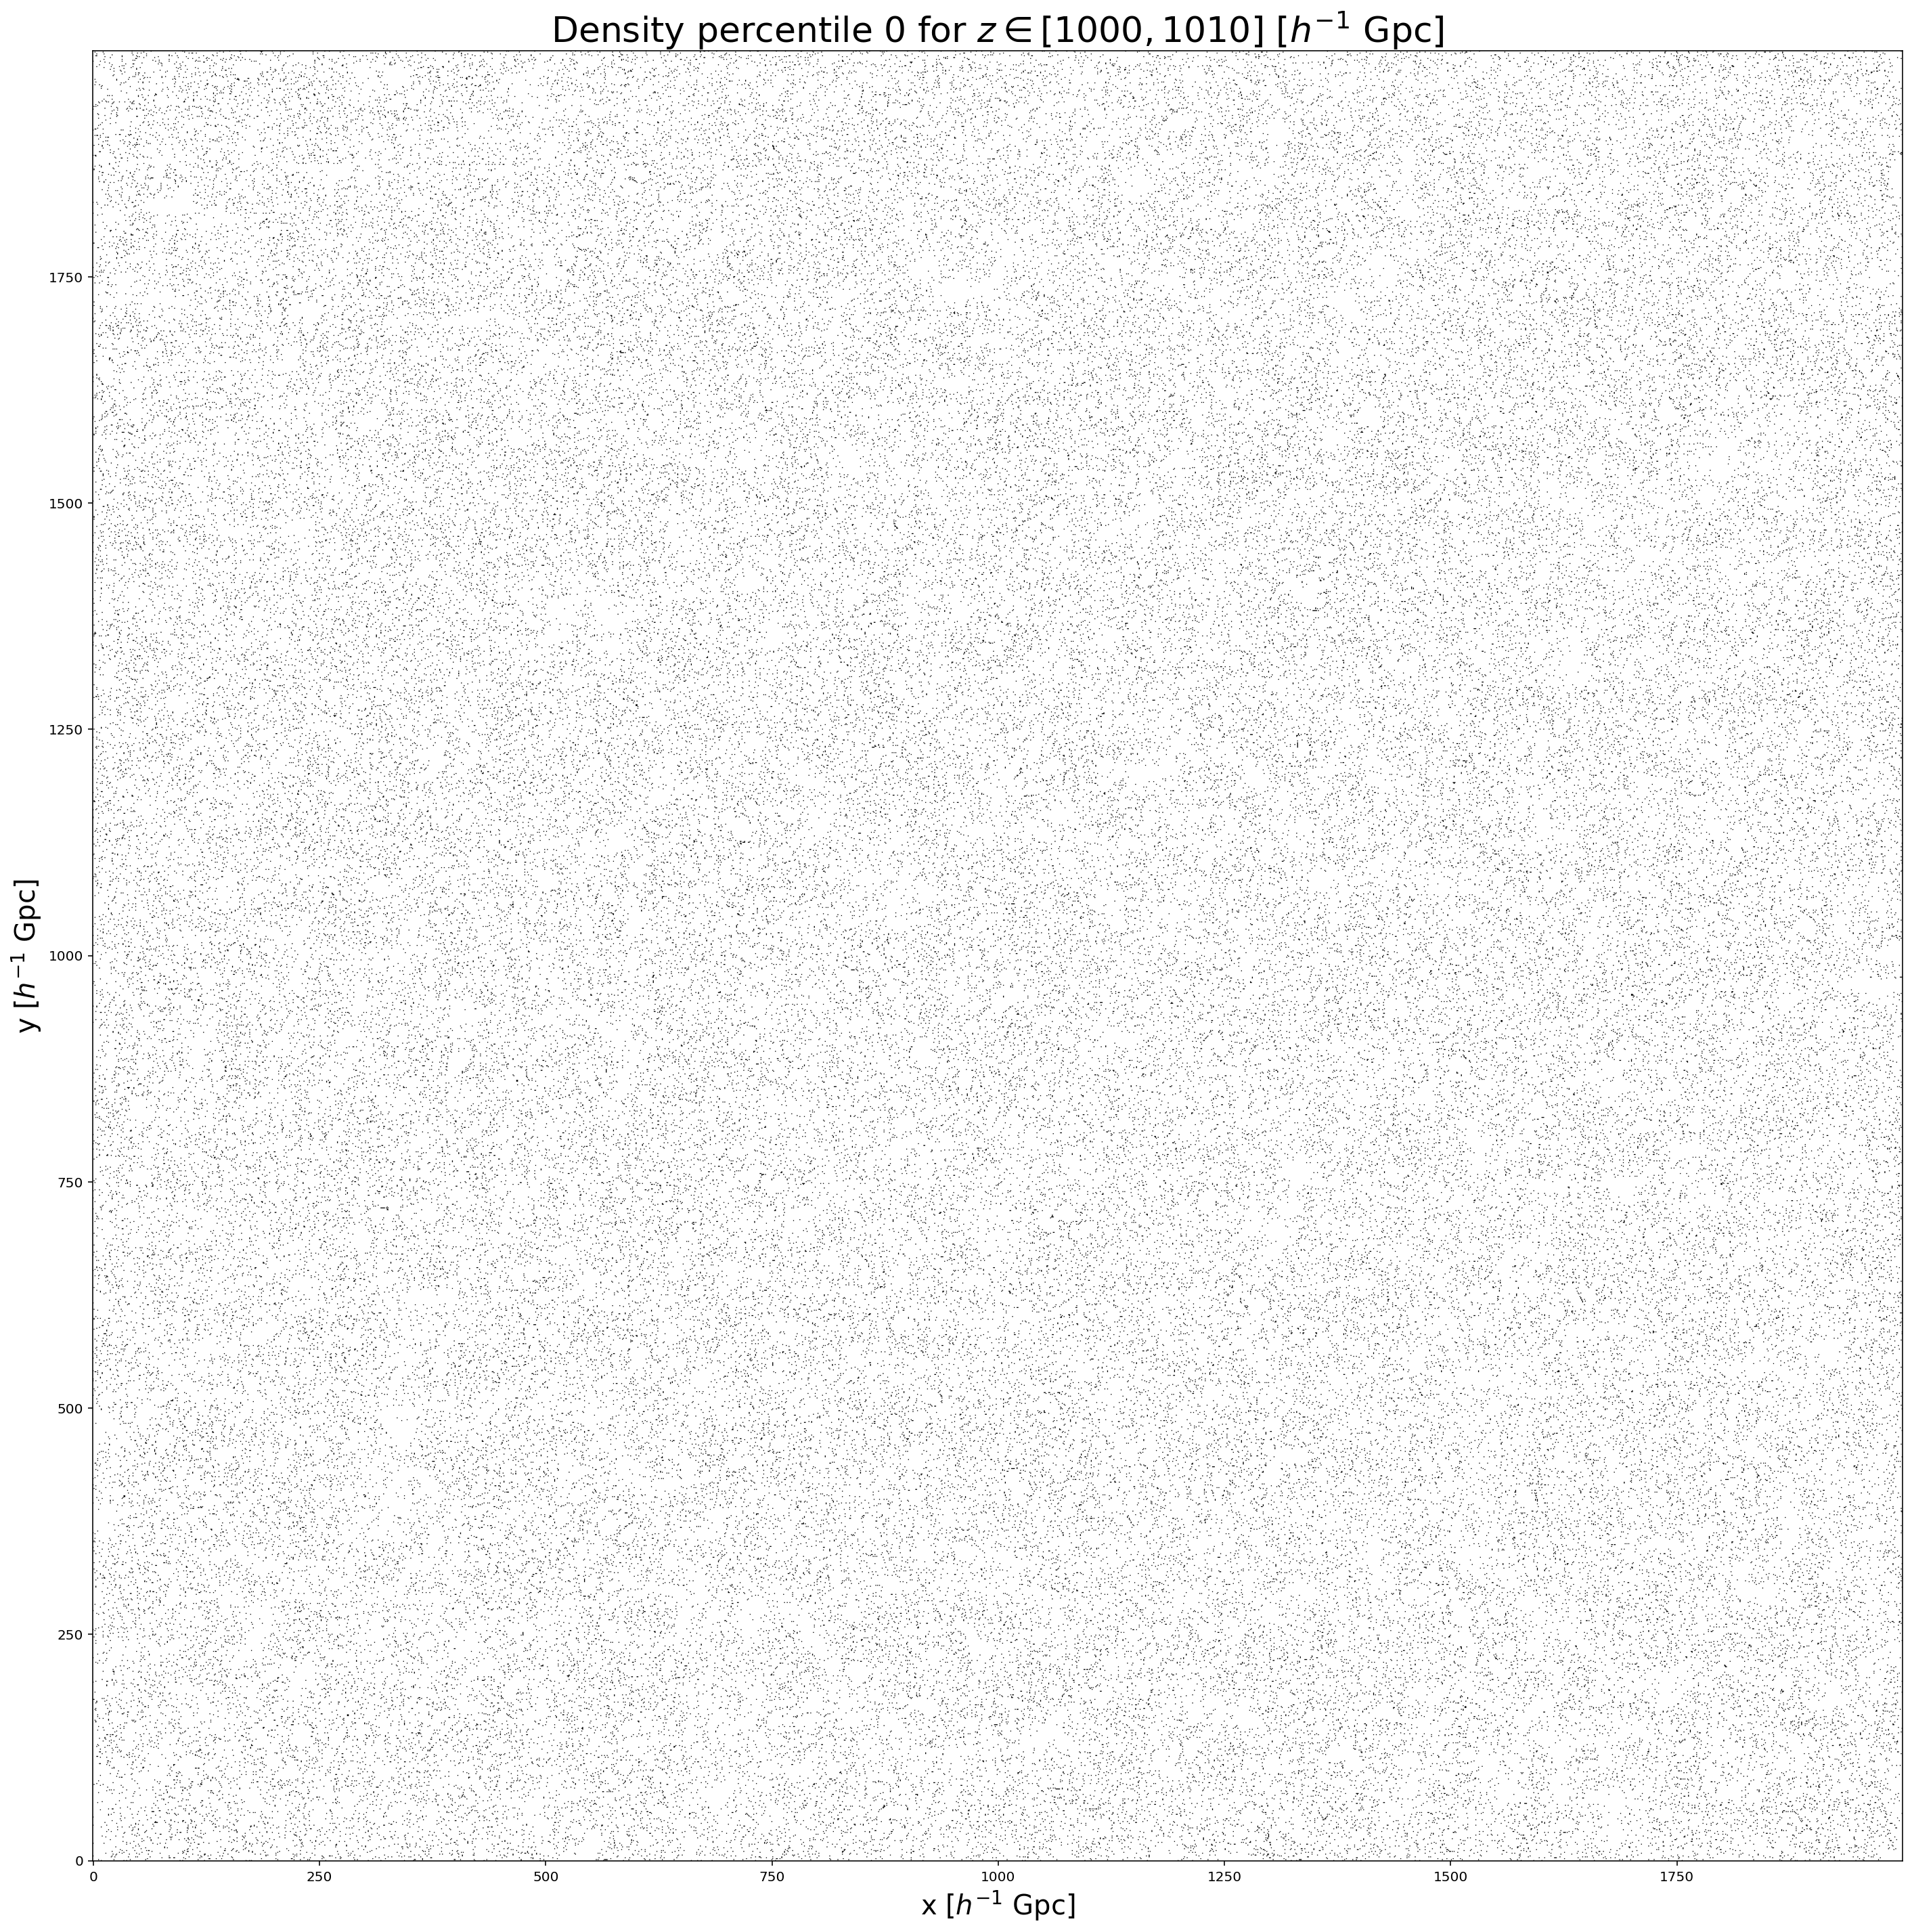

In [253]:
# plot slice of denisty field of single percentilein specified z range
i = 0
z_min, z_max = 1000, 1010 # Gpc/h

fig, ax = plt.subplots(figsize=(20,20))

# selected galaxies must be in percentile and in considered z range
mask = np.load('power_densitybins/selection_ptile_%d.npy'%i)
gals_in_ptile = cat[mask]
gals_sel = gals_in_ptile[(gals_in_ptile['z']>z_min)*(gals_in_ptile['z']<z_max)]

# make grid of size 1 Mpc/h
img = np.zeros((BoxSize,BoxSize))
gals_x, gals_y = np.array(gals_sel['x'], dtype='int16'), np.array(gals_sel['y'], dtype='int16')

for j in range(len(gals_x)):
    img[gals_x[j]][gals_y[j]] = 1

ax.imshow(img, origin='lower', cmap='binary')
ax.set_title(r'Density percentile %d for $z \in [%d,%d]$ [$h^{-1} \ \mathrm{Gpc}$]'%(i,z_min,z_max), fontsize=26)
ax.set_xlabel(r'x [$h^{-1} \ \mathrm{Gpc}$]', fontsize=20)
ax.set_ylabel(r'y [$h^{-1} \ \mathrm{Gpc}$]', fontsize=20)
    
fig.tight_layout()
plt.show()

fig.savefig('plots/show_densityfield/ptile%d.pdf'%i)